# Введение в ML

## Исходные данные

Будем использовать датасет по стоимости страховых услуг - подробнее см. [соревнование на Kaggle](https://www.kaggle.com/mirichoi0218/insurance)

In [ ]:
import logging
import os
import shutil

import gdown
import numpy as np


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)  # гарантируем воспроизводимость

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info('Инициализировали логгер')

file_url = 'https://drive.google.com/file/d/1rM-2syrHv9LAJWi_iHI24giTEWgNbbvB/view?usp=sharing'

root_data_dir = '/content/'
file_name = 'insurance.csv'

if not os.path.exists(root_data_dir):
  raise RuntimeError('Отсутствует директория с данными')
else:
  gdown.download(file_url, file_name, quiet=False, fuzzy=True)
  logger.info('Содержимое директории %s: %s', root_data_dir, os.listdir(root_data_dir))

Downloading...
From: https://drive.google.com/uc?id=1rM-2syrHv9LAJWi_iHI24giTEWgNbbvB
To: /content/insurance.csv
100%|██████████| 55.6k/55.6k [00:00<00:00, 51.8MB/s]


Среди файлов находится `insurance.csv` - это и есть данные по стоимости страховки, на примере которых мы познакомимся с основными понятиями ML

Прочитаем файл с помощью бибилиотеки pandas

In [ ]:
import os
import pandas as pd

insurance_df = pd.read_csv(os.path.join(root_data_dir, file_name))

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Наш таргет (целевая переменная) находится в столбце `charges`

Визуализируем переменную с помощью `.scatter`

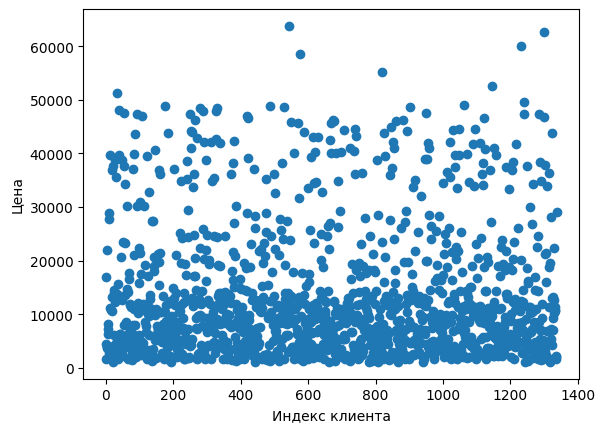

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

y = insurance_df['charges']

fig, subplot = plt.subplots()
plt.scatter(
    np.arange(len(y)),
    y
)
subplot.set_xlabel('Индекс клиента')
subplot.set_ylabel('Цена')
fig.show()

Получается не очень наглядно - попробуем визуализировать с помощью метода `.hist()` который реализован в pandas

<Axes: >

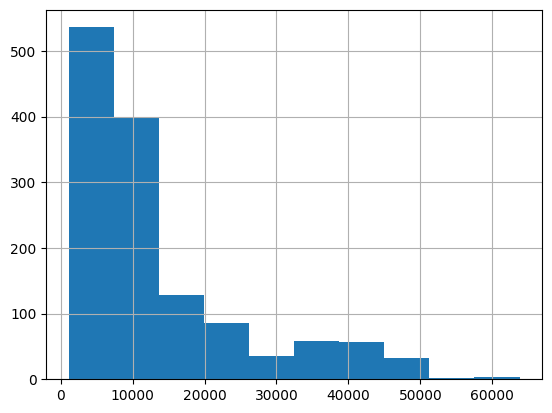

In [ ]:
y.hist()

Для каждого объекта построим предсказания с помощью модели линейной регрессии. Воспользуемся как чёрным ящиком питоновским объектом из бибилиотеки [sklearn](https://scikit-learn.org/stable/)

Модели машинного обучения не могут работать с текстом напрямую (вспоминаем лекцию) - а у нас много текстовых полей, их нужно трансформировать в числа - воспользуемся классом `sklearn.preprocessing.LabelEncoder` из библиотеки sklearn

Чтобы преобразовать колонку в текст нужно воспользоватьеся методом [.fit_transform()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for label in ['sex', 'smoker', 'region']:
  insurance_df[label] = LabelEncoder().fit_transform(insurance_df[label])

insurance_df.head()
#-------- ВАШ КОД ТУТ -------------------






#----------------------------------------

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Обучим линейную регрессию - это класс [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Что нужно для счастья
* создать объект
* вызвать метод *.fit()*

Загляните в документацию метода [.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) который принимает на вход два аргумента

* $X$ - матрица объекты - признаки. Удалите из датафрейма `insurance_df` столбец `charges` и сохраните результат в переменную $X$
* `y` - значение целевой переменной

In [ ]:
reg = None  # объект модели линейной регрессии

#-------- ВАШ КОД ТУТ -------------------
import numpy as np
from sklearn.linear_model import LinearRegression

y = insurance_df['charges']
X = insurance_df.copy().drop(['charges'], axis=1)
reg = LinearRegression().fit(X, y)
#----------------------------------------

Добавим к датафрейму столбец `prediction`

In [ ]:
insurance_df['prediction'] = reg.predict(X)

Задача - посчитайте эмпирический риск по формуле

$$
Q_{\text{emp}}(h) = \frac{1}{N}\sum_{i=1}^{N}L(h(x_i, \theta), y_i)
$$

где $h(\cdot)$ - значение столбца prediction

Для удобства создайте столбец `squared_loss` - там должно храниться значение $L(y,\hat{y})$:

$L(y,\hat{y}) = (y - \hat{y})^2$

Пользоваться можно только функциями pandas

Полученное значение $Q$ округлите с помощью `np.round(Q, decimals=1)`

In [34]:
num_rows = insurance_df.shape[0]
insurance_df['squared_loss'] = np.zeros(num_rows)

#-------- ВАШ КОД ТУТ -------------------
insurance_df['squared_loss'] = np.round((y - insurance_df['prediction']) ** 2, decimals=1)
insurance_df
#----------------------------------------

,age,sex,bmi,children,smoker,region,charges,prediction,squared_loss
0,19,0,27.900,0,1,3,16884.92400,25111.241864,67672305.6
1,18,1,33.770,1,0,2,1725.55230,3687.605173,3849651.5
2,28,1,33.000,3,0,2,4449.46200,6963.145707,6318605.8
3,33,1,22.705,0,0,1,21984.47061,3741.308405,332812967.2
4,32,1,28.880,0,0,1,3866.85520,5537.640897,2791524.8
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,12302.006002,2894958.3
1334,18,0,31.920,0,0,0,2205.98080,3431.371647,1501582.7
1335,18,0,36.850,0,0,2,1629.83350,4363.662366,7473820.3
1336,21,0,25.800,0,0,3,2007.94500,1106.986613,811726.0


Визуализируем гистограмму остатков линейной регрессии - это разница между истинным и предсказанным значением.

<Axes: >

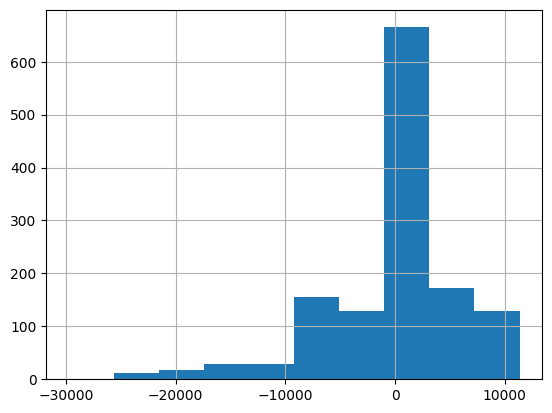

In [35]:
(insurance_df['prediction'] - y).hist()

Кстати, метрику качества необязательно считать вручную - в sklearn реализовано [огромное количество метрик](https://scikit-learn.org/stable/modules/classes.html#regression-metrics) для регрессии (и других задач тоже)

Подробнее о метриках регрессии мы поговорим в дальнейших занятиях

В качестве упражнения посчитайте какую-нибудь метрику - например, MAE - [sklearn.metrics.mean_absolute_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [36]:
#-------- ВАШ КОД ТУТ -------------------
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y, insurance_df['prediction'])
MAE

# много получилось из-за отстутствия скейлинга
#----------------------------------------

4172.48711494405

Мы поговорили про фичи, про метрики - можно немного углубиться в модель, что представляет собой линейная регрессия?

Задача *линейной* регресии: восстановить на функцию $h(x_i)$ в виде *линейной комбинации* (т.е. суммы с некоторыми весами *важности*) признаков объекта. Сами признаки называются *предикторами*:,
$$
\forall x_i: h(x) = w_0 + w_1x_i^1 + \ldots + w_nx_i^n = \sum_{j=1}^{n}w_jx_i^j = \overline{x}_i^T\overline{w}
$$

К признаковому пространству добавляется "фиктивный" признак $x_0=1$, "важность" которого сохраняется в коэффициент $w_0$.

То есть "семейство функций" представляет собой всевозможные комбинации $[w_0, w_1 , w_2 , w_3 , w_4 , w_5 , w_6]$ а метод *.fit()* волшебным образом подбирает их так, чтобы получить максимальное качество.

Мера качества $L$ для задачи регрессии - квадрат разности между фактическим значением и прогнозом. ,
$$
L(h(x_i, \theta), y_i) = \left(y_i - h(x_i, \theta)\right)^2 = \left(y_i -  \sum_{j=1}^{n}w_jx_i^j\right)^2
$$

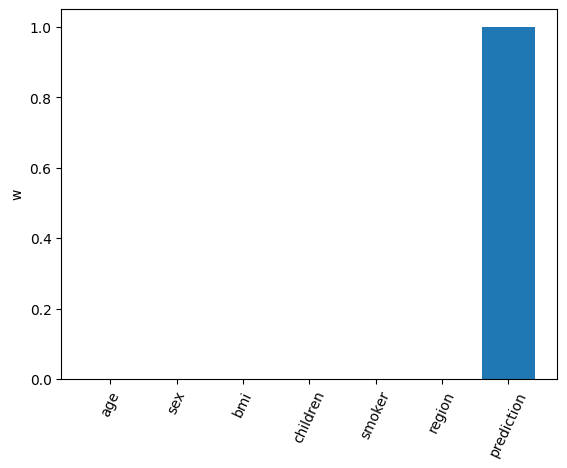

In [37]:
fig, subplot = plt.subplots()
plt.bar(np.arange(len(reg.coef_)), reg.coef_)
subplot.set_xticks(np.arange(len(reg.coef_)))
subplot.set_xticklabels(X.columns.tolist(), rotation=65)
subplot.set_ylabel('w')
fig.show()

В качестве финального задания разберёмся как делать валидацию

Нам понадобится функция [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

Функция принимает несколько аргументов

* `X, y` - первые два аргумента, которые нужно засплиттить
* `test_size=0.33` - доля датасета, которая уйдет в тест
* `random_state=RANDOM_SEED`

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=0.33, random_state=42)

#-------- ВАШ КОД ТУТ -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#----------------------------------------

Обучите модель на X_train, y_train вызвав метод fit

In [43]:
validated_reg = None

#-------- ВАШ КОД ТУТ -------------------
validated_reg = LinearRegression().fit(X_train, y_train)
#----------------------------------------

Сделайте предикт на `X_test`, `y_test` - сохраните его в переменную `y_test_predicted`

In [46]:
y_test_predicted = np.zeros_like(y_test)
#-------- ВАШ КОД ТУТ -------------------

y_test_predicted = validated_reg.predict(X_test)
#----------------------------------------

Посчитайте [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

* `y_true`
* `y_pred`

Ответ округлите `np.round(mse, decimals=1)`

In [49]:
#-------- ВАШ КОД ТУТ -------------------
MAE = mean_absolute_error(y_test, y_test_predicted)
MAE
#----------------------------------------

4204.415654724157